# 🎬 Netflix Content Analysis (EDA)

**Tools:** Python, Pandas, Seaborn, Matplotlib  
**Focus:** How Netflix content varies by country, genre, and over time.  
**Key Skills:** Data cleaning, feature engineering, grouping/aggregation, visualization, exploratory analysis.

In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="muted")

print("Libraries imported successfully!")

Libraries imported successfully!


In [251]:
df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [252]:
df.info()
df.describe(include='all')
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [253]:
# Fill missing text columns with 'Unknown'
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Unknown')

# Drop rows missing 'date_added'
df = df.dropna(subset=['date_added'])

In [254]:
# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year_added
df['year_added'] = df['date_added'].dt.year

In [255]:

# Split duration into value and unit
df[['duration_value', 'duration_unit']] = df['duration'].str.extract(r'(\d+)\s*(\w+)')
df['duration_value'] = pd.to_numeric(df['duration_value'], errors='coerce')

# Preview cleaned duration
df[['type', 'duration', 'duration_value', 'duration_unit']].head(10)

,type,duration,duration_value,duration_unit
0,Movie,90 min,90.0,min
1,TV Show,2 Seasons,2.0,Seasons
2,TV Show,1 Season,1.0,Season
3,TV Show,1 Season,1.0,Season
4,TV Show,2 Seasons,2.0,Seasons
5,TV Show,1 Season,1.0,Season
6,Movie,91 min,91.0,min
7,Movie,125 min,125.0,min
8,TV Show,9 Seasons,9.0,Seasons
9,Movie,104 min,104.0,min


In [256]:
# Ensure 'country' is text
df['country'] = df['country'].fillna('Unknown').astype(str)

# Split genres and countries into separate rows
df_genre = df.assign(listed_in=df['listed_in'].str.split(', ')).explode('listed_in')
df_country_genre = df_genre.assign(country=df_genre['country'].str.split(',')).explode('country')

# Strip spaces and replace blanks
df_country_genre['country'] = df_country_genre['country'].str.strip()
df_country_genre['country'] = df_country_genre['country'].replace('', 'Unknown')

# Preview cleaned result
df_country_genre[['country', 'listed_in']].head(10)

,country,listed_in
0,United States,Documentaries
1,South Africa,International TV Shows
1,South Africa,TV Dramas
1,South Africa,TV Mysteries
2,Unknown,Crime TV Shows
2,Unknown,International TV Shows
2,Unknown,TV Action & Adventure
3,Unknown,Docuseries
3,Unknown,Reality TV
4,India,International TV Shows


In [257]:
df_country_genre.info()
df_country_genre.head()

<class 'pandas.core.frame.DataFrame'>
Index: 23744 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         23744 non-null  object        
 1   type            23744 non-null  object        
 2   title           23744 non-null  object        
 3   director        23744 non-null  object        
 4   cast            23744 non-null  object        
 5   country         23744 non-null  object        
 6   date_added      23536 non-null  datetime64[ns]
 7   release_year    23744 non-null  int64         
 8   rating          23744 non-null  object        
 9   duration        23741 non-null  object        
 10  listed_in       23744 non-null  object        
 11  description     23744 non-null  object        
 12  year_added      23536 non-null  float64       
 13  duration_value  23741 non-null  float64       
 14  duration_unit   23741 non-null  object        
dtypes: datet

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,duration_value,duration_unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,90.0,min
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0,2.0,Seasons
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021.0,2.0,Seasons
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021.0,2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,2021.0,1.0,Season


## 🎬 Netflix Content Analysis

### Most Common Genres Globally and per Country

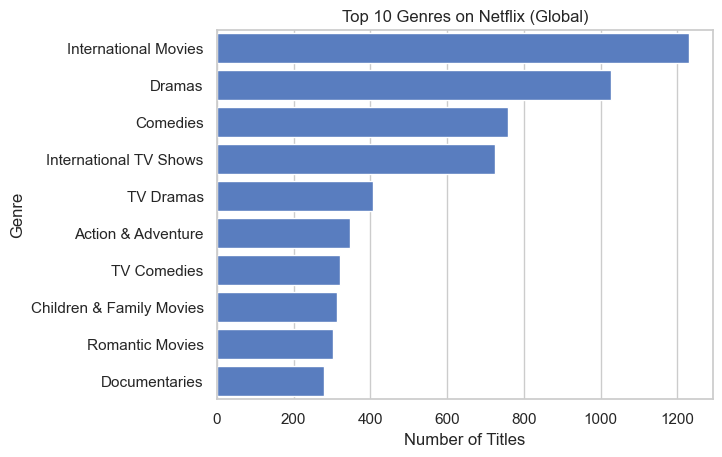

In [258]:
#Changed the values in the listed_in column and made new rows for each genre
#Data frame is called df_exploded for this visualization
df_exploded = df.assign(listed_in=df['listed_in'].str.split(', ').explode('listed_in'))

#
top_genres = df_exploded['listed_in'].value_counts().head(10)
sns.barplot(y=top_genres.index, x=top_genres.values)
plt.title("Top 10 Genres on Netflix (Global)")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

**Insight:**
International titles, Comedies and Drama dominate Netflix's catalog. While the other popular genres have a well balanced mix. 

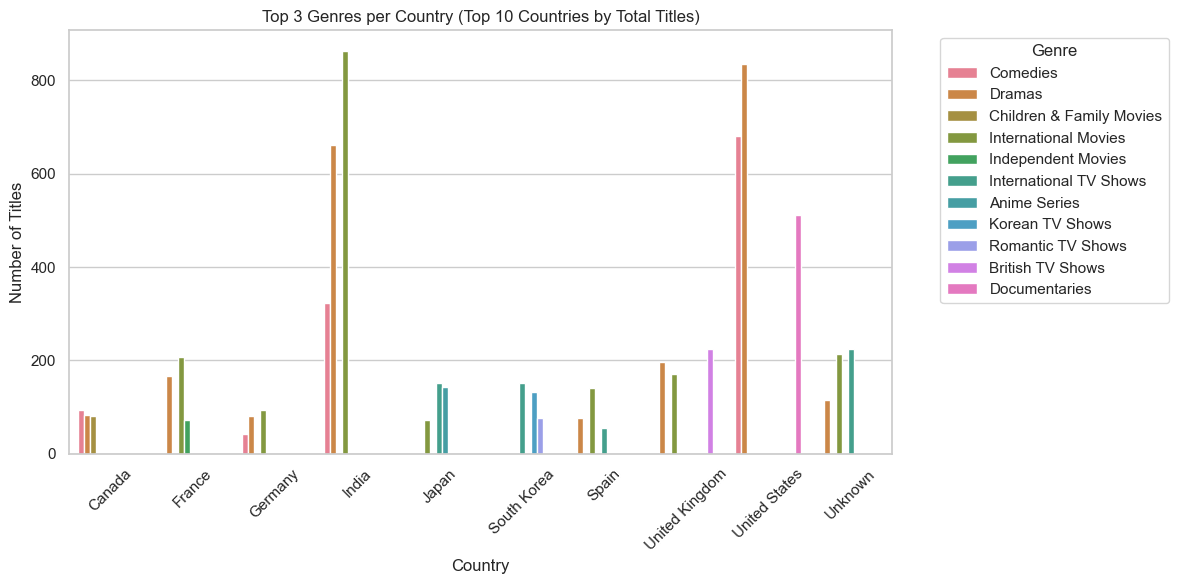

In [260]:
top10_countries = (
    df_country_genre['country']
    .value_counts()
    .head(10)
    .index
)

top3_genres_per_country = (
    df_country_genre[df_country_genre['country'].isin(top10_countries)]
    .groupby(['country', 'listed_in'])
    .size()
    .reset_index(name='count')
)

# Keep only top 3 genres per country
top3_genres_per_country = (
    top3_genres_per_country
    .sort_values(['country', 'count'], ascending=[True, False])
    .groupby('country')
    .head(3)
)

plt.figure(figsize=(12,6))
sns.barplot(
    data=top3_genres_per_country,
    x='country', y='count', hue='listed_in'
)
plt.title("Top 3 Genres per Country (Top 10 Countries by Total Titles)")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.legend(
    title="Genre",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.show()

**Insight:**
While Comedy and Drama dominate most in most countries, Anime for Japan and Documentaries for the U.S. make up a surprising amount of titles. 

### Count of Movies vs TV Shows per Country

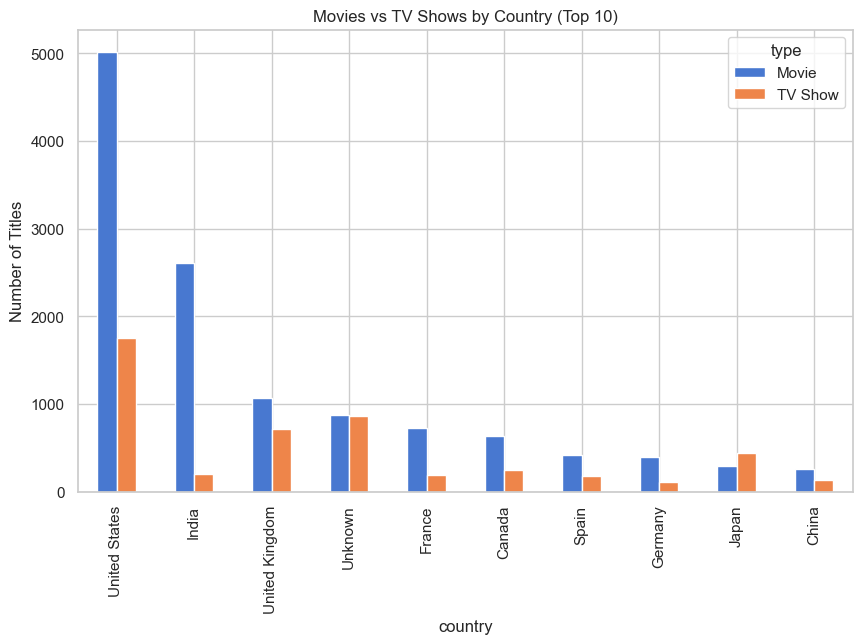

In [261]:
type_country = (
    df_country_genre.groupby(['country', 'type'])
    .size()
    .unstack(fill_value=0)
)

type_country.nlargest(10, ['Movie', 'TV Show']).plot(kind='bar', figsize=(10,6))
plt.title("Movies vs TV Shows by Country (Top 10)")
plt.ylabel("Number of Titles")
plt.show()

**Insight:**
The U.S. and India dominate in the amount of movies, while the United Kingdom has the #2 spot behind the U.S. While most countries have about the same ratio of Tv Shows to Movies, India's ratio is very low relative to their amount of total titles, and Japan is one of the only countries with more Tv Shows than Movies, likely due to the popularity of Japanese Anime around the world.

### Average Duration of Movies and TV Shows (by Country)

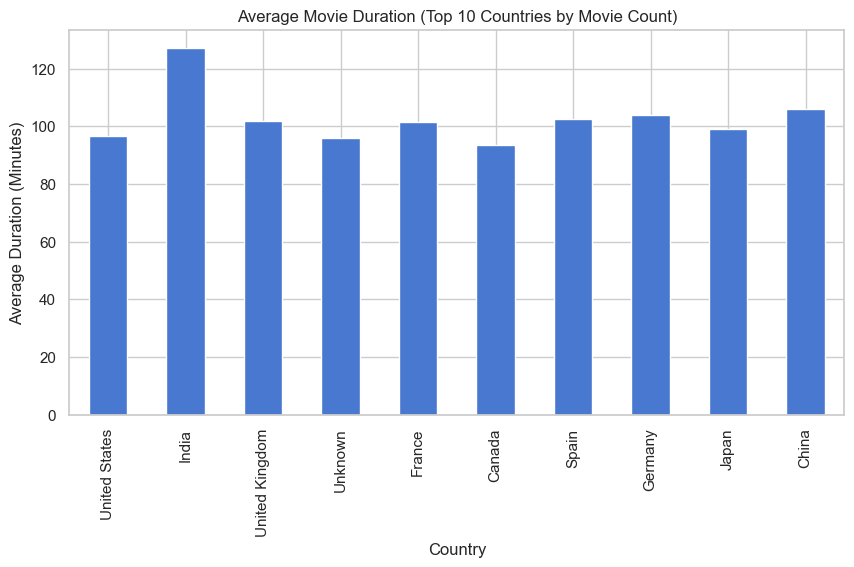

In [262]:

movie_counts = (
    df_country_genre[df_country_genre['type'] == 'Movie']
    .groupby('country')['duration_value']
    .count()
    .sort_values(ascending=False)
)
top10_countries = movie_counts.head(10).index

avg_duration_top10 = (
    df_country_genre[
        (df_country_genre['type'] == 'Movie') &
        (df_country_genre['country'].isin(top10_countries))
    ]
    .groupby('country')['duration_value']
    .mean()
    .loc[top10_countries]  # keep the same order
)


avg_duration_top10.plot(kind='bar', figsize=(10,5))
plt.title("Average Movie Duration (Top 10 Countries by Movie Count)")
plt.ylabel("Average Duration (Minutes)")
plt.xlabel("Country")
plt.show()

**Insight:**
Most countries do not differ much in the average movies duration, but India has much longer movies averaging over 2 hours.

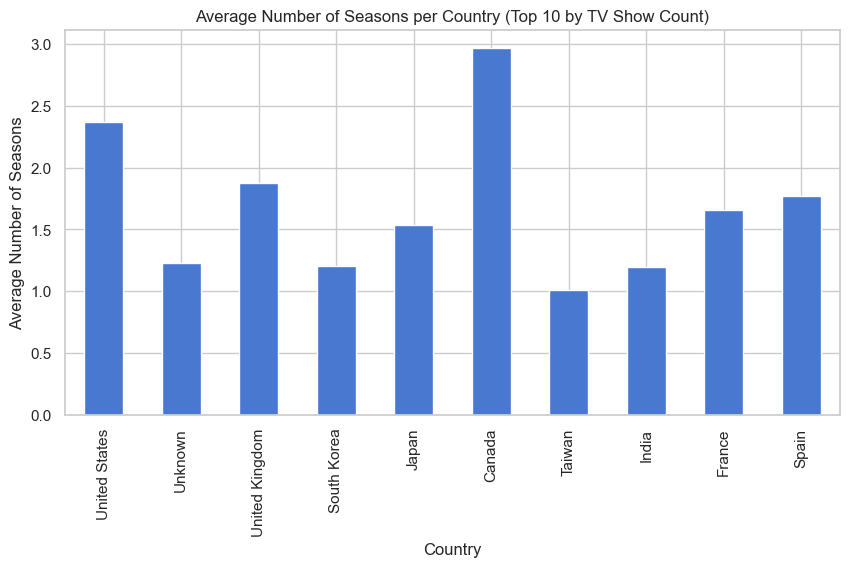

In [263]:
tv_counts = (
    df_country_genre[df_country_genre['type'] == 'TV Show']
    .groupby('country')['duration_value']
    .count()
    .sort_values(ascending=False)
)

top10_tv_countries = tv_counts.head(10).index

avg_tv_duration_top10 = (
    df_country_genre[
        (df_country_genre['type'] == 'TV Show') &
        (df_country_genre['country'].isin(top10_tv_countries))
    ]
    .groupby('country')['duration_value']
    .mean()
    .loc[top10_tv_countries]  # keep order same as count
)

avg_tv_duration_top10.plot(kind='bar', figsize=(10,5))
plt.title("Average Number of Seasons per Country (Top 10 by TV Show Count)")
plt.ylabel("Average Number of Seasons")
plt.xlabel("Country")
plt.show()

**Insight:**
Canada averages almost 3 seasons per Tv Show compared to most other countries which have anywhere from 1-2. However this could be skewed considering Canada's total title count is very low.

### Year-to-Year Change in Titles Added

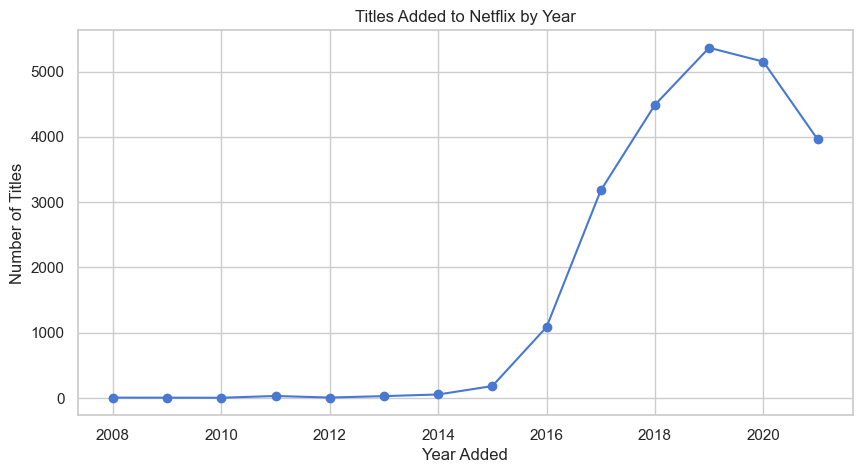

In [264]:
titles_per_year = df_country_genre['year_added'].value_counts().sort_index()
titles_per_year.plot(kind='line', marker='o', figsize=(10,5))
plt.title("Titles Added to Netflix by Year")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()

**Insight:**
From 2015 to 2019, the number of titles added increased sharply, suggesting Netflix heavily expanded its catalog during this period. After 2019, the trend begins to go the opposite way, possibly indicating a shift from quantity to content strategy.

### Most Popular Release Years

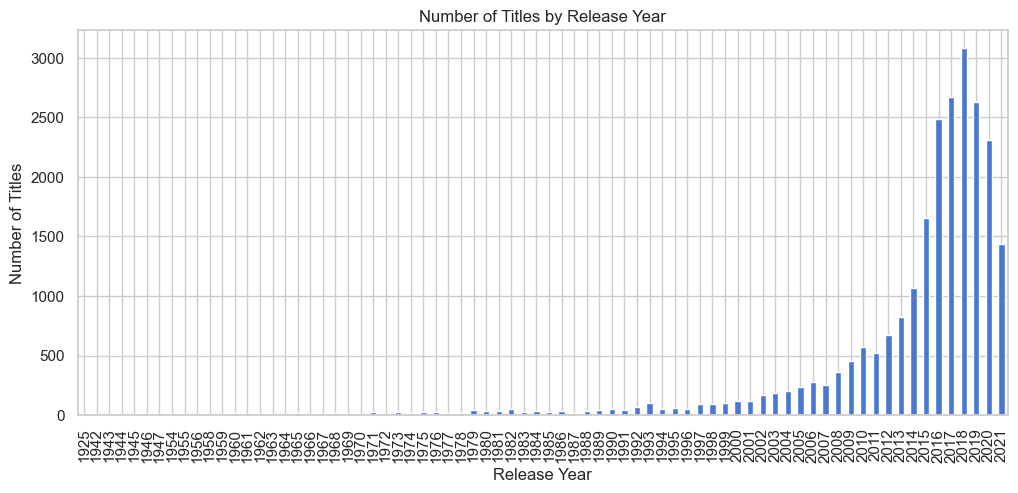

In [266]:
df_country_genre['release_year'].value_counts().sort_index().plot(kind='bar', figsize=(12,5))
plt.title("Number of Titles by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()

**Insight:** 
Following the trend of Titles added per year, the most popular era of titles in Netflix's catalog is between 2015 and 2020. This suggests Netlfix has new releases as one of their top priorities when it comes to adding new content. 

# 📌After-Analysis Reflection

After looking through all of the data, it is clear the U.S. dominates Netflix's catalog. Leading in number of titles for both Movies and Tv Shows by a wide margin. One of the main goals of this analysis was to see how the Movie and TV industry is different from country to country. As you can see from the Movie vs.TV show chart, the ratio of Movies to TV Shows varies a lot by country. India has a signficantly low ratio of TV shows compared to Japan which is one of the only countries to have more TV shows than Movies, which may be due to the popularity of Japanese Anime. The top genres over-all, Comedy and Drama, dominate most countries except for South Korea, Japan and The United Kingdom which each have a strong Tv Show culture compared to other countries. The data suggests that Netflix had its peak in the years 2015-2020 based on how many titles were added in those years as well as the release year of the titles that were added. The reason for the recent decline could be due to the decrease in Netlfix's popularity or a change in the priority of quantity over quality.

## ✅ Answers to Project Questions

### Most common genres per country/year
Comedy and Drama are consistently the most common genres in each country, however in countries Eastern Asia, like Japan and South Korea, other genres, like Anime, dominate.

### Count of movies vs TV shows per country
the U.S. and India lead in total titles but India's ratio of Tv Shows to Movies is significantly lower than most countries. On the other hand, Japan isn't really close in terms of total titles but is one of the only countries with more Tv Shows than Movies in Netlfix's catalog.

### Average duration
For the most part the difference in average movie duration does not change significantly with each country except India which leads by bit of a wide margin. Canada is leading the pack in average season per TV Show with around 3 even though they do not have many titles available.

### Year-to-year change in titles added
Netflix peaked in the late 2010's in titles added which is around the time many people started switching to soley streaming services for television. From the chart it seems as if the trend is no on the downward slope but that could be due to popularity of Netflix decreasing or a focus on adding more quality titles and less on the quantity.

### Most popular release years
2015-2020 is the most popular era of titles on Netflix which matches up with the number of titles added. It seems netlfix focused on bringing in new movies for customers instead of older movies which have already proved their popularity in the past.

## 📂 How to Read This Notebook

1. Data loading & cleaning (missing values, dates, duration, countries)
2. Exploratory questions (movies vs TV, genres, ratings)
3. Visual summaries with insights
4. Focus on cross-country and cultural differences in content